In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path_data="C:/Users/franc/DATA/DATA_Projet/Kaggle/defauts_plaques_acier/data/raw/train.csv"

df=pd.read_csv(path_data, index_col=0)
df.head()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
id,,,,,,,,,,,,,,,,,,,,,
0,584,590,909972,909977,16,8,5,2274,113,140,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


Compréhension des features:

X_Minimum, X_Maximum : Les coordonnées minimales et maximales en X de la région où le défaut a été détecté. Cela donne une idée de la position horizontale du défaut sur la plaque.

Y_Minimum, Y_Maximum : Les coordonnées minimales et maximales en Y de la région où le défaut a été détecté, indiquant la position verticale du défaut.

Pixels_Areas : La taille de la région du défaut en termes de nombre de pixels, ce qui donne une indication de la taille du défaut.

X_Perimeter, Y_Perimeter : Le périmètre de la région du défaut mesuré horizontalement et verticalement. Cela pourrait aider à comprendre la forme du défaut.

Sum_of_Luminosity : La somme de la luminosité des pixels dans la région du défaut, ce qui peut donner des indices sur l'intensité du défaut.

Minimum_of_Luminosity, Maximum_of_Luminosity : La luminosité minimale et maximale parmi tous les pixels du défaut, fournissant une plage de l'intensité lumineuse du défaut.

Length_of_Conveyer : La longueur du convoyeur sur lequel la plaque d'acier est inspectée. Cela peut avoir une influence sur la détection des défauts.

TypeOfSteel_A300, TypeOfSteel_A400 : Indicateurs binaires (0 ou 1) pour le type d'acier de la plaque, ce qui pourrait affecter la propension à certains types de défauts.

Steel_Plate_Thickness : L'épaisseur de la plaque d'acier, un facteur qui pourrait influencer la visibilité des défauts.

Edges_Index : Un indice lié aux bords du défaut, pouvant indiquer la netteté ou la rugosité des bords du défaut.

Empty_Index : Un indice qui pourrait indiquer des zones vides ou moins denses en termes de pixels dans la région du défaut.

Square_Index, Outside_X_Index : Indices calculés qui peuvent donner des informations sur la forme et l'orientation du défaut.

Edges_X_Index, Edges_Y_Index : Indices liés aux bords du défaut en X et Y, fournissant des détails sur la forme des bords dans ces directions.

Outside_Global_Index : Un indice indiquant si le défaut s'étend au-delà de la plaque d'acier.

LogOfAreas, Log_X_Index, Log_Y_Index : Le logarithme des aires et des dimensions du défaut, utile pour normaliser la distribution des tailles de défauts.

Orientation_Index, Luminosity_Index : Indices donnant des informations sur l'orientation du défaut et la luminosité relative dans la région du défaut.

SigmoidOfAreas : Le sigmoid des aires, qui peut aider à comprendre la distribution des tailles de défauts d'une manière qui favorise les valeurs moyennes.

In [18]:
df.shape

(19219, 34)

In [5]:
df.isna().sum().sum()
#pas de valeurs manquantes

0

In [7]:
df.duplicated().sum()
#pas de doublons

0

In [24]:
for i in ["Pastry",	"Z_Scratch",	"K_Scatch",	"Stains",	"Dirtiness",	"Bumps",	"Other_Faults"]:

    p = round(df[i].sum()/df.shape[0],3)
    print(f"la proportion de defaut du type {i} est de {p}")

la proportion de defaut du type Pastry est de 0.076
la proportion de defaut du type Z_Scratch est de 0.06
la proportion de defaut du type K_Scatch est de 0.179
la proportion de defaut du type Stains est de 0.03
la proportion de defaut du type Dirtiness est de 0.025
la proportion de defaut du type Bumps est de 0.248
la proportion de defaut du type Other_Faults est de 0.341


In [ ]:
df["several_defaut"]=df["Pastry"]+df["Z_Scratch"]+df["K_Scatch"]+df["Stains"]+df["Dirtiness"]+df["Bumps"]+df["Other_Faults"]
df["several_defaut"].value_counts(normalize=True)

#95% des entrées présentent 1 seul défaut
#4% sont sans défaut
#0,1% ont deux défauts
#pas de triple défaut ou plus...

In [ ]:
df.info()
#que des valeurs numériques, pas de catégories

In [28]:
df.describe()

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults,several_defaut
count,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,19219.000000,...,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,128.647380,...,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225,0.958531
std,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,14.196976,...,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133,0.204786
min,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,39.000000,...,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,124.000000,...,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,127.000000,...,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,135.000000,...,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,253.000000,...,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


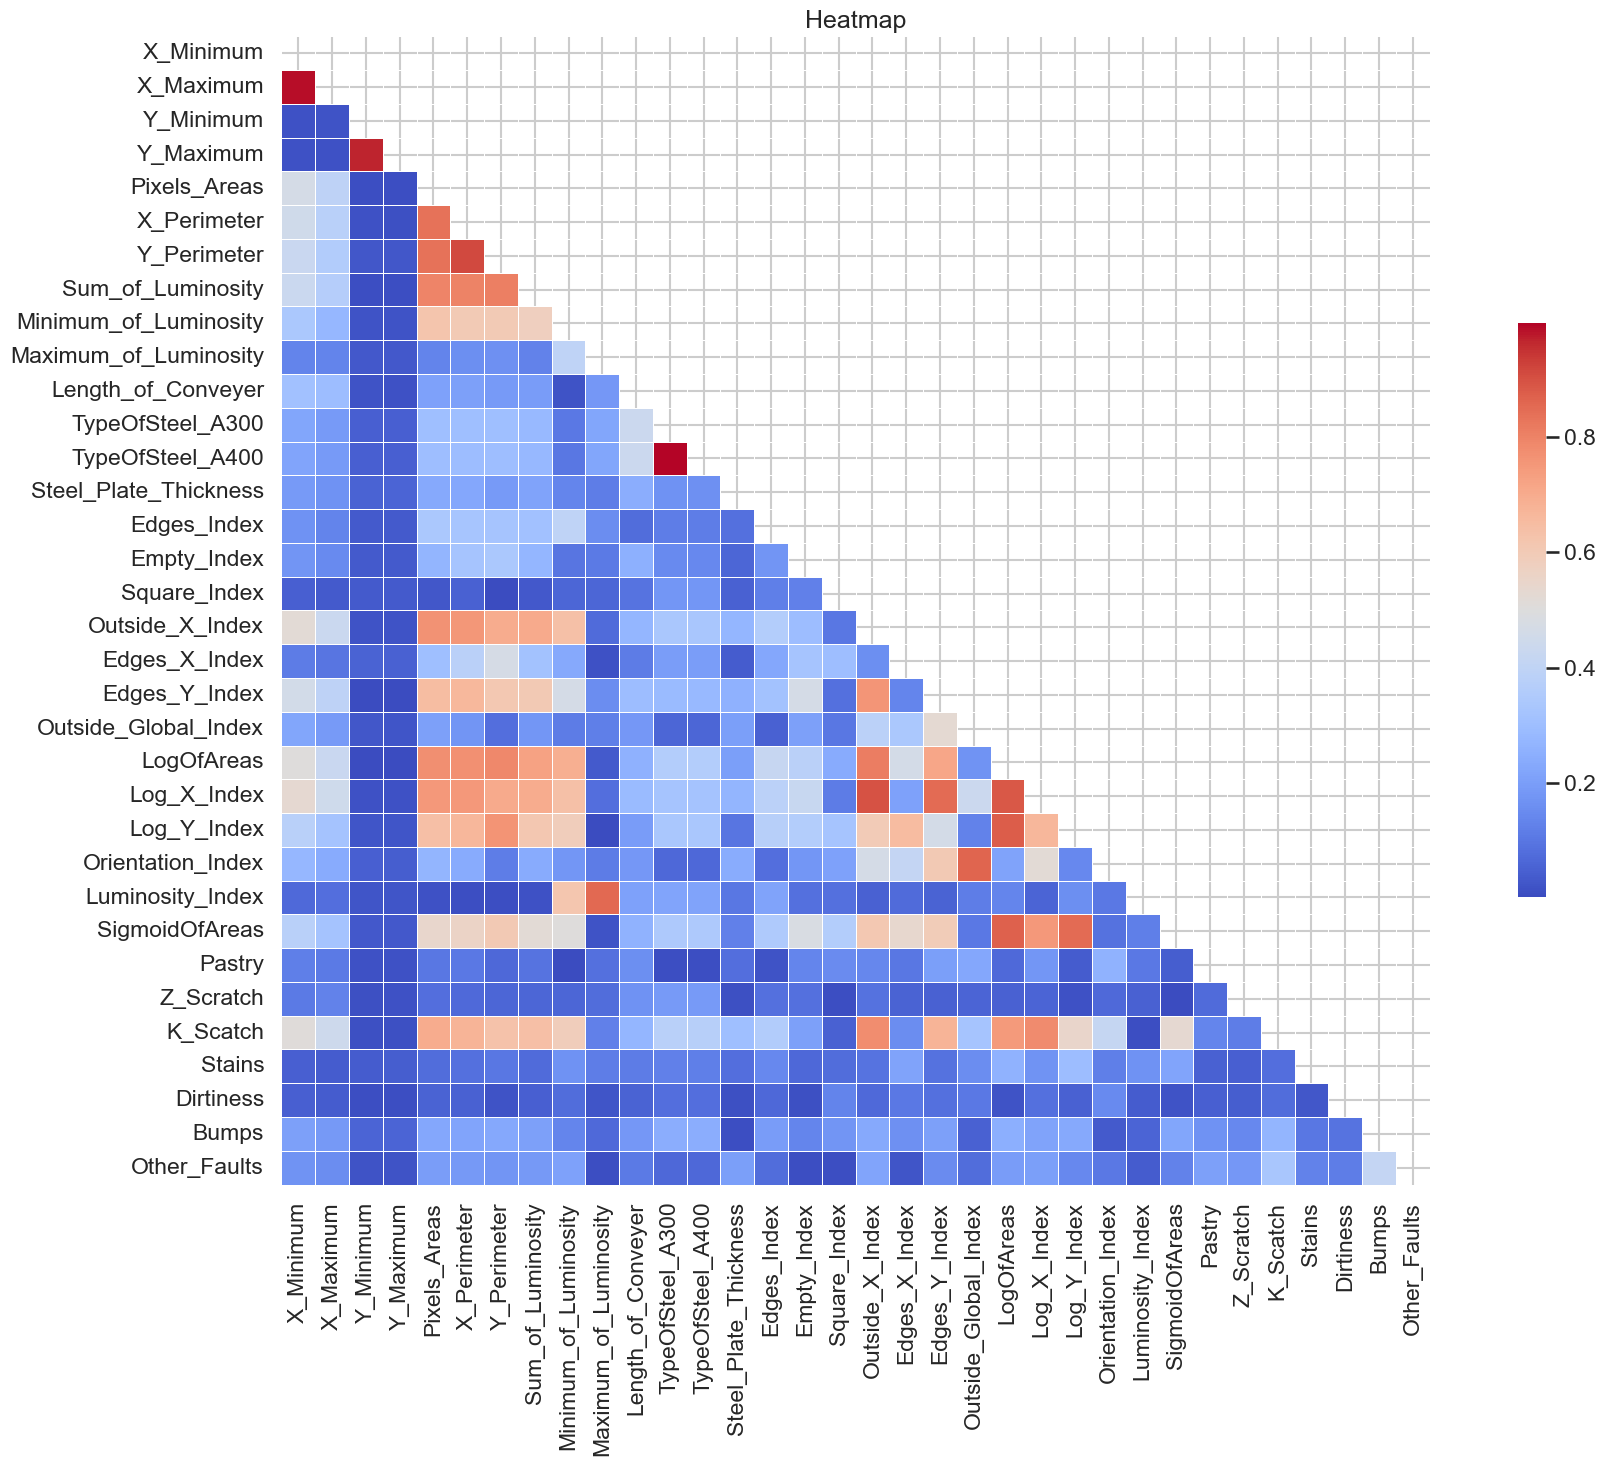

In [6]:
sns.set_theme(context='talk', style='whitegrid')  # Le contexte 'talk' est mieux pour les grands graphiques


f, ax = plt.subplots(figsize=(20, 15))

# masque pour le triangle supérieur
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Configurer la heatmap
sns.heatmap(
    np.abs(df.corr()),  
    annot=False,        
    linewidths=.5,      
    ax=ax,              
    mask=mask,          
    cbar_kws={"shrink": .5},  
    square=True,        # Forcer les cellules à être carrées
    cmap='coolwarm'     # Utiliser une carte de couleurs divergente
)

plt.title("Heatmap")
plt.xticks(rotation=90)  
plt.yticks(rotation=0)               
plt.tight_layout()                  
plt.show()                           